## Unsupervised Machine Learning
* There is no Target variable
* Derive insights from the data directly using machine learning algorithms

## Principal Component Analysis

* In simple words, principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set. 
* It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible. 
* With fewer variables, visualization also becomes much more meaningful. PCA is more useful when dealing with high dimensional data(more than 20 columns).


#### What are principal components ?

A principal component is a normalized linear combination of the original predictors in a data set
* Let’s say we have a set of predictors as X1, X2...,Xp
* The First principal component can be written as: Z1 = Φ¹ * X1 + Φ² * X2 + Φ³ * X3 + .... +Φp¹ * Xp
* First principal component is a linear combination of original predictor variables which captures the maximum variance in the data set. It determines the direction of highest variability in the data. Larger the variability captured in first component, larger the information captured by component. No other component can have variability higher than first principal component.
* The first principal component results in a line which is closest to the data i.e. it minimizes the sum of squared distance between a data point and the line.
* Similarly, we can compute the second, third, fourth principal component also.



In [19]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [20]:
DataIris=pd.read_csv('E:/Study Stuff/DataScience/Python/Adv_ML/Python Datasets/Classification Datasets/IRIS.csv', encoding='latin')

### Load Iris dataset

In [21]:
DataIris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
# Keeping the target variable for future reference
TargetVariable=DataIris['Species']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=DataIris.drop('Species', axis=1)

OnlyPredictors.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
# Extracting the target variable array y and Predictor variables array X
y = TargetVariable.values
X = OnlyPredictors.values


# Printing top 10 sample values
print(X[0:10])
print(y[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa']


### Applying PCA

In [24]:
# Creating maximum components equal to the total number of columns to analyze all of them
pca = PCA(n_components=4)
#lda = LinearDiscriminantAnalysis(n_components=2)

# fitting the data
pca_fit=pca.fit(X)
#lda_fit=lda.fit(X,y)

# calculating the principal components
reduced_X = pca_fit.transform(X)
#reduced_X_lda = lda_fit.transform(X)

#4 Columns present in X are now represented by 4 Principal components present in reduced_X
print(np.round(reduced_X[0:4],2))
#print(np.round(reduced_X_lda[0:4],2))

[[-2.68  0.32 -0.03 -0.  ]
 [-2.71 -0.18 -0.21 -0.1 ]
 [-2.89 -0.14  0.02 -0.02]
 [-2.75 -0.32  0.03  0.08]]


In [25]:
# The Amount of variance explained by each principle componnent
var_explained= pca.explained_variance_ratio_
#lda.explained_variance_ratio_
print(np.round(var_explained,2))

# The first component and second component explain 92% and 5% variance of data respectively

[0.92 0.05 0.02 0.01]


In [26]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#var_explained_cumulative_lda = np.cumsum(np.round(lda.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)
#var_explained_cumulative_lda

[ 92.46  97.77  99.48 100.  ]


### Finding optimal number of Principal components

Text(0, 0.5, '% Variance explained')

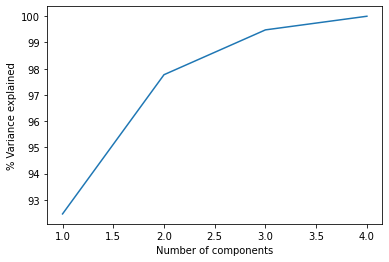

In [29]:
# By Looking at below graph we can see that 3 components are explaining maximum Variance in the dataset
# The elbow occurs at 3rd principal component
plt.plot( range(1,5), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

### Creating final number of Principal Components

In [30]:
# Choosing 3-principal components based on above graph
pca = PCA(n_components=3)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

# Four Columns present in X are now represented by 3-Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[-2.68  0.32 -0.03]
 [-2.71 -0.18 -0.21]
 [-2.89 -0.14  0.02]
 [-2.75 -0.32  0.03]
 [-2.73  0.33  0.09]
 [-2.28  0.74  0.17]
 [-2.82 -0.09  0.26]
 [-2.63  0.16 -0.02]
 [-2.89 -0.58  0.02]
 [-2.67 -0.11 -0.2 ]]


In [31]:
# Printing the factor loadings
# The Coefficient which is multiplied with each column to get 3 Principal Components
# for example PC1 = 0.36*(Sepal.Length) -0.08*(Sepal.Width) +0.8*(Petal.Length) +0.35*(Petal.Width)
loadings = pca.components_
print(loadings)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]


In [32]:
ReducedIris=pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3'])
ReducedIris['Species']=y
ReducedIris.head()

,PC1,PC2,PC3,Species
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa


### Now any machine learning classification algorithm can be used on above data

### Inverse transform
We can get the original data from the principal components using inverse transform


In [15]:
OriginalData=pca_fit.inverse_transform(reduced_X)

In [16]:
# Printing sample rows
OriginalData[0:10]

array([[5.09928623, 3.50072335, 1.40108561, 0.1982949 ],
       [4.86875839, 3.03166108, 1.4475168 , 0.12536791],
       [4.69370023, 3.20638436, 1.30958161, 0.18495067],
       [4.6238432 , 3.07583667, 1.46373578, 0.25695828],
       [5.0193263 , 3.58041421, 1.37060574, 0.24616799],
       [5.40763506, 3.89226243, 1.68838749, 0.41823916],
       [4.61518853, 3.38460754, 1.37689906, 0.33628341],
       [5.0142909 , 3.38551722, 1.47826432, 0.23413908],
       [4.40843762, 2.89144909, 1.38716683, 0.22015637],
       [4.91776048, 3.08200106, 1.47298727, 0.14242745]])

In [17]:
# Comparing the above array with the original data
OnlyPredictors.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Home Work
1. Find out how many optimal number of Principal components can explain BostonHousingData
2. Create model using these principal components and target variable MEDV
3. Compare the accuracy results with the model created on raw data

In [35]:
BostonData=pd.read_csv('E:/Study Stuff/DataScience/Python/Adv_ML/Python Datasets/Regression Datasets/BostonHousingData.csv')
BostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [36]:
BostonData.shape

(506, 14)

In [43]:
# Keeping the target variable for future reference
TargetVariable=BostonData['MEDV']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=BostonData.drop('MEDV', axis=1)

OnlyPredictors.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [44]:
# Extracting the target variable array y and Predictor variables array X
y = TargetVariable.values
X = OnlyPredictors.values


# Printing top 10 sample values
print(X[0:5])
print(y[0:5])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
[24.  21.6 34.7 33.4 36.2]


In [48]:
# Creating maximum components equal to the total number of columns to analyze all of them
pca = PCA(n_components=13)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

#4 Columns present in X are now represented by 4 Principal components present in reduced_X
print(np.round(reduced_X[0:4]))

[[-120.   -6.   -3.    5.   -2.   -6.   -1.    5.   -2.   -0.    0.   -0.
     0.]
 [-169.   10.  -31.    1.    0.   -3.   -1.    1.    0.    1.    0.   -0.
    -0.]
 [-169.   14.  -17.  -10.   -0.   -6.    2.    1.    0.    1.   -0.   -0.
    -0.]
 [-190.   18.   -7.  -20.    2.   -7.   -2.    1.    1.    1.   -0.   -0.
     0.]]


In [49]:
# The Amount of variance explained by each principle componnent
var_explained= pca.explained_variance_ratio_
print(np.round(var_explained,2))

# The first component and second component explain 92% and 5% variance of data respectively

[0.81 0.16 0.02 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


In [50]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[80.58 96.89 99.02 99.72 99.85 99.92 99.96 99.98 99.99 99.99 99.99 99.99
 99.99]


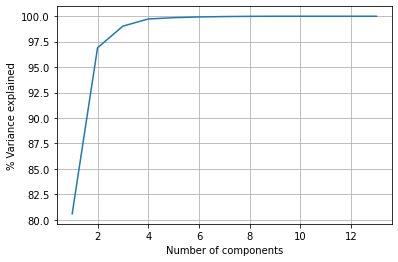

In [52]:
# By Looking at below graph we can see that 3 components are explaining maximum Variance in the dataset
# The elbow occurs at 3rd principal component
plt.plot( range(1,14), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')
plt.grid()

In [53]:
# Choosing 3-principal components based on above graph
pca = PCA(n_components=4)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

# Four Columns present in X are now represented by 3-Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[-119.82   -5.56   -3.17    5.29]
 [-168.89   10.12  -30.78    1.3 ]
 [-169.31   14.08  -16.75  -10.28]
 [-190.23   18.3    -6.53  -19.64]
 [-190.13   16.1   -13.16  -14.18]
 [-188.95   18.73  -16.49  -11.34]
 [-104.34   -8.74   -7.38    1.85]
 [-102.09  -10.11  -30.32   20.94]
 [ -98.53   -0.25  -34.02   23.87]
 [-100.03   -0.32  -22.15   14.31]]


In [54]:
orig = pca_fit.inverse_transform(reduced_X)
orig

array([[ 2.46061794e-01,  1.86362456e+01,  7.98225995e+00, ...,
         1.76646121e+01,  3.96980034e+02,  1.04061714e+01],
       [-8.78506741e-01,  2.51639338e-01,  9.00457263e+00, ...,
         1.77861376e+01,  3.96915593e+02,  1.17528189e+01],
       [-1.33950224e+00,  2.62707809e-01,  7.88191640e+00, ...,
         1.79877366e+01,  3.92870474e+02,  9.93940431e+00],
       ...,
       [ 2.12463129e-01,  3.81065086e-04,  1.04019345e+01, ...,
         1.78358068e+01,  3.96989087e+02,  1.33104220e+01],
       [ 2.16829336e-01, -2.54374359e-02,  1.03094903e+01, ...,
         1.78517375e+01,  3.93528883e+02,  1.31814888e+01],
       [-7.03880823e-02, -1.22868785e-01,  9.79703370e+00, ...,
         1.79520604e+01,  3.96952278e+02,  1.23052159e+01]])

In [57]:
X.

TypeError: 'memoryview' object is not callable